In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
review_path = '/Users/vguetermann/code/vict0riaaaa/scorecast/raw_data/yelp_academic_dataset_review.json'

def process_and_load_json_in_batches(file_path, chunk_size=100000):
    chunks = []
    with pd.read_json(file_path, lines=True, chunksize=chunk_size) as reader:
        for chunk in reader:
            chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

# Load and process data
review = process_and_load_json_in_batches(review_path)

In [32]:
csv_path = '/Users/vguetermann/code/vict0riaaaa/scorecast/data/restaurants.csv'

restaurant_business_ids = pd.read_csv(csv_path)
restaurant_business_ids_list = restaurant_business_ids['business_id'].tolist()

filtered_review = review[review['business_id'].isin(restaurant_business_ids_list)]
filtered_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


## Overall Analysis of the Data Set
- No missing values in this data set.
- There are no duplicates in this data set.

In [34]:
filtered_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [35]:
filtered_review.size

42520239

In [36]:
filtered_review.shape

(4724471, 9)

In [37]:
filtered_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [38]:
filtered_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4724471 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 360.4+ MB


In [39]:
filtered_review.describe()

,stars,useful,funny,cool
count,4.724471e+06,4.724471e+06,4.724471e+06,4.724471e+06
mean,3.793798e+00,9.840992e-01,3.013692e-01,4.795771e-01
std,1.391227e+00,2.739150e+00,1.717190e+00,2.159917e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,4.200000e+02,7.920000e+02,4.040000e+02


In [40]:
# Missing Values
filtered_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [41]:
# Duplicated Reviews
filtered_review.review_id.duplicated().sum()

0

## Review Length vs. Start Rating
- The most common ratings are 5 stars, followed by 1-star ratings.
- Most reviews are between < 0 and 2000 characters. 
- There seems to be no significant influence of the star rating on the length of the reviews. 

In [42]:
# Distribution of Star Reviews
count = filtered_review['stars'].value_counts()
print(count)

5    2079441
4    1130251
1     567185
3     543108
2     404486
Name: stars, dtype: int64


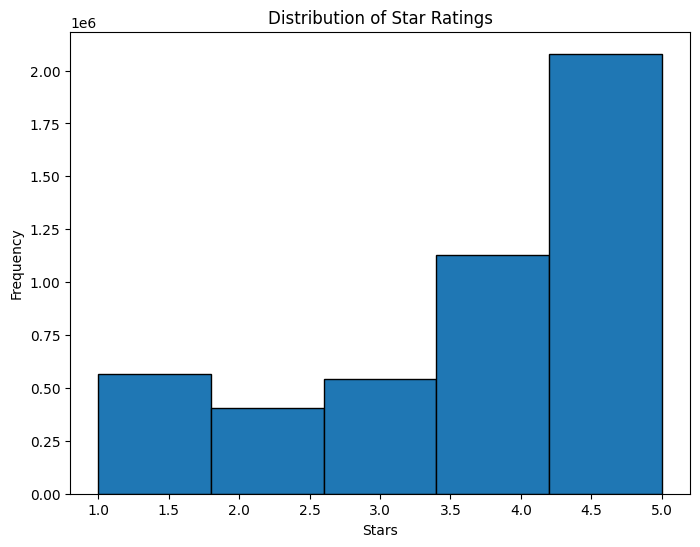

In [43]:
plt.figure(figsize=(8, 6))
filtered_review['stars'].plot.hist(bins=5, edgecolor='black')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

/var/folders/pp/83wrh0zd09gbbvzv0d9wrc7h0000gn/T/ipykernel_89027/1268354964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_review['text_length'] = filtered_review['text'].apply(len)


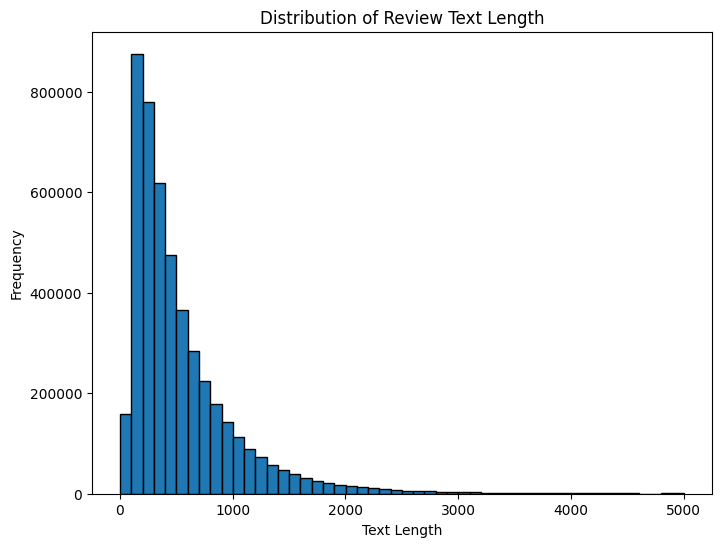

In [44]:
# Review Length in Characters
filtered_review['text_length'] = filtered_review['text'].apply(len)

plt.figure(figsize=(8, 6))
filtered_review['text_length'].plot.hist(bins=50, edgecolor='black')
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

/Users/vguetermann/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/vguetermann/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/vguetermann/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/vguetermann/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_a

<Figure size 1400x800 with 0 Axes>

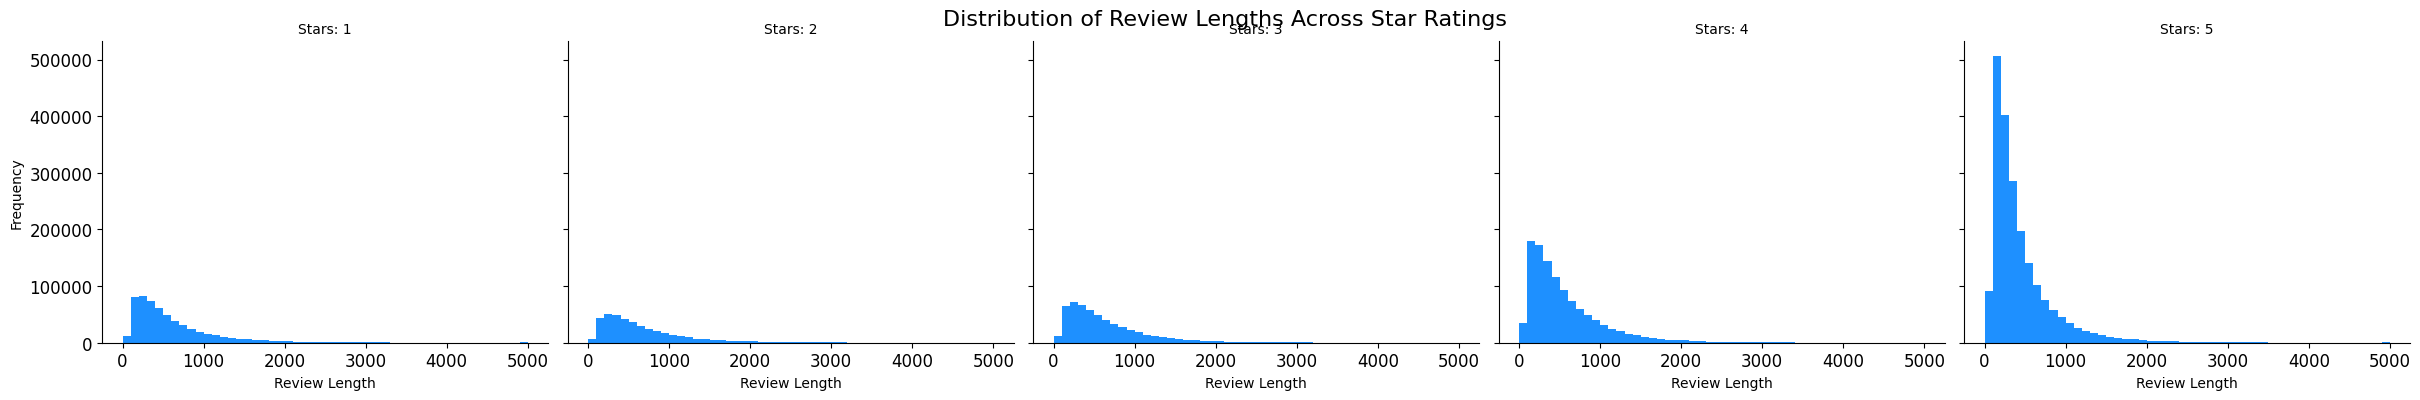

In [45]:
# Comparing Review Length to Stars
plt.figure(figsize=(14, 8))
graph = sns.FacetGrid(data=filtered_review, col='stars', height=4, aspect=1.2)
graph.map(plt.hist, 'text_length', bins=50, color='dodgerblue')

# Add titles and labels to each subplot
graph.set_axis_labels('Review Length', 'Frequency')
graph.set_titles('Stars: {col_name}')

# Adjust the space between plots
graph.fig.subplots_adjust(top=0.9)

# Add an overall title to the plot
graph.fig.suptitle('Distribution of Review Lengths Across Star Ratings', fontsize=16)

# Increase the size of tick labels for better readability
for ax in graph.axes.flat:
    ax.tick_params(labelsize=12)

# Show the plot
plt.show()

## Number of Yelp Reviews per Year

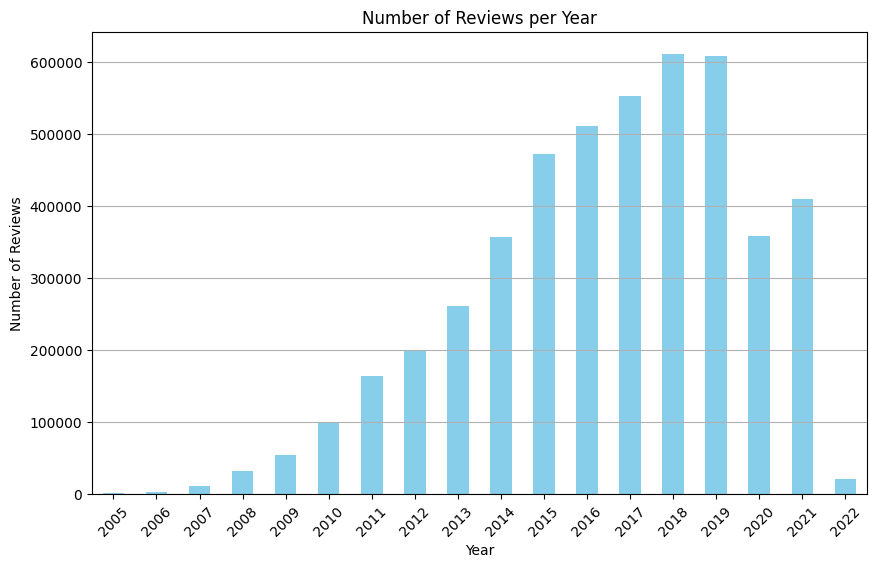

In [56]:
filtered_review['date'] = pd.to_datetime(filtered_review['date'])

# Extract the year from the date
filtered_review['year'] = filtered_review['date'].dt.year

# Count the number of reviews per year
reviews_per_year = filtered_review.groupby('year').size()

# Plotting
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

## Average Yelp Star Ratings per Year

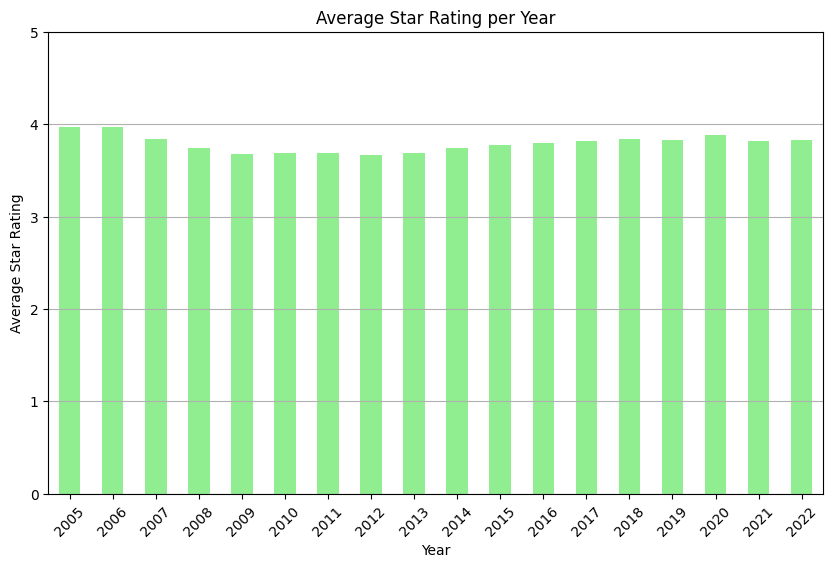

In [57]:
# Calculate the average star rating per year
average_stars_per_year = filtered_review.groupby('year')['stars'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_stars_per_year.plot(kind='bar', color='lightgreen')
plt.title('Average Star Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(axis='y')

# Display the plot
plt.show()

In [58]:
# Calculate the overall average star rating across all years
overall_average_stars = filtered_review['stars'].mean()

overall_average_stars

3.7937982897979476

In [59]:
# Calculate the MSE compared to the overall average
mse = ((average_stars_per_year - overall_average_stars) ** 2).mean()
mse

0.008137102134196005

In [60]:
# Calculate the median star rating per year
median_stars_per_year = filtered_review.groupby('year')['stars'].median()

# Calculate the overall median star rating across all years
overall_median_stars = filtered_review['stars'].median()

overall_median_stars

4.0

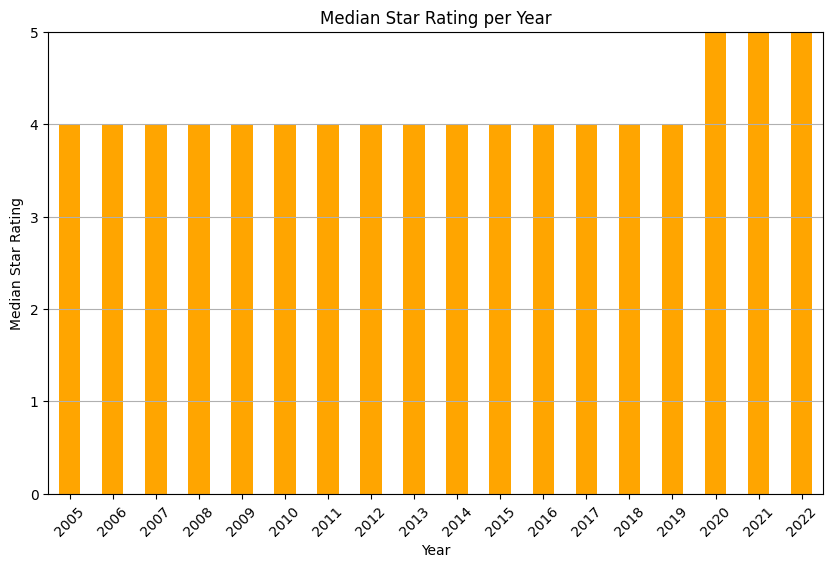

In [61]:
# Plotting the median star rating per year
plt.figure(figsize=(10, 6))
median_stars_per_year.plot(kind='bar', color='orange')
plt.title('Median Star Rating per Year')
plt.xlabel('Year')
plt.ylabel('Median Star Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(axis='y')

# Display the plot
plt.show()

## Language Analysis

In [50]:
from langdetect import detect, LangDetectException

filtered_review = filtered_review.copy()

def detect_language(text):
    try:
        if text and len(text.strip()) > 10:
            return detect(text)
        else:
            return 'unknown'
    except LangDetectException:
        return 'unknown'

# Function to process the data in chunks
def process_in_chunks(df, chunk_size=10000):
    chunks = []
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end].copy()  # Select the chunk
        chunk['language'] = chunk['text'].apply(detect_language)  # Apply the language detection

        # Print or display the chunk to see the output
        print(f'Chunk {start} to {end} processed:')
        print(chunk[['text', 'language']].head())  # Display the first few rows of the chunk

        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

# Process the entire DataFrame in chunks
filtered_review = process_in_chunks(filtered_review, chunk_size=10000)

# Final output display (optional)
print("Final combined DataFrame:")
print(filtered_review[['text', 'language']].head())

Chunk 0 to 10000 processed:
                                                text language
0  If you decide to eat here, just be aware it is...       en
2  Family diner. Had the buffet. Eclectic assortm...       en
3  Wow!  Yummy, different,  delicious.   Our favo...       en
4  Cute interior and owner (?) gave us tour of up...       en
5  I am a long term frequent customer of this est...       en
Chunk 10000 to 20000 processed:
                                                    text language
13999  Stopped in here while on a quick trip to Nashv...       en
14000  Great food and handled a large group well.  I ...       en
14002  Tonight I was really disappointed. I called an...       en
14004  I've been in a couple of times with large grou...       en
14005  Great beer selection. Great food, (the pizza i...       en
Chunk 20000 to 30000 processed:
                                                    text language
27727  The ambiance was fantastic, the food was delic...       en
27729  H

In [55]:
filtered_review.to_csv('../data/filtered_review.csv')

In [52]:
# Count the number of occurrences of each language
language_counts = filtered_review['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Display the counts
language_counts

,language,count
0,en,4719393
1,es,2001
2,fr,518
3,de,514
4,it,347
5,pt,185
6,af,168
7,nl,165
8,zh-cn,159
9,unknown,142


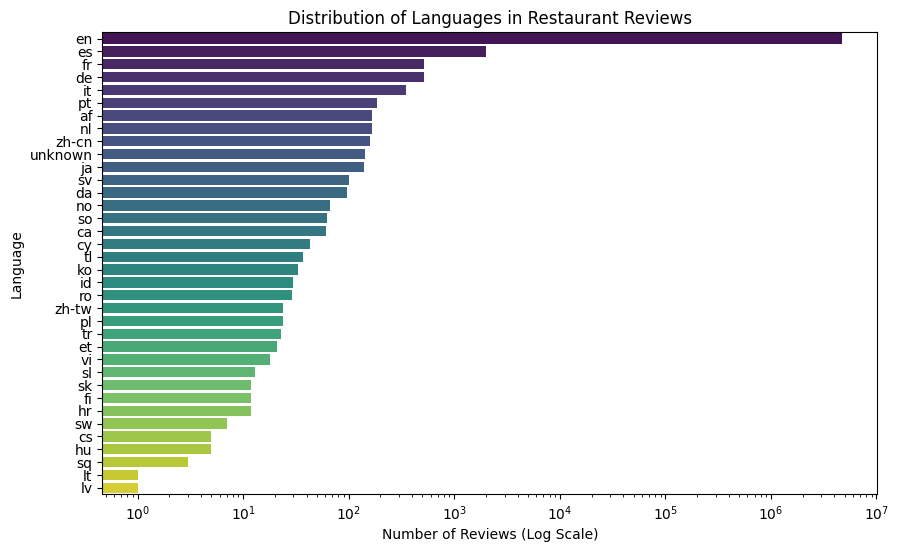

In [54]:
# Plot the distribution of languages using a logarithmic scale
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='language', data=language_counts, palette='viridis')
plt.xscale('log')  # Set x-axis to a logarithmic scale

# Add titles and labels
plt.xlabel('Number of Reviews (Log Scale)')
plt.ylabel('Language')
plt.title('Distribution of Languages in Restaurant Reviews')

# Show the plot
plt.show()

In [64]:
# Drop reviews that are not in English
filtered_review_english = filtered_review[filtered_review['language'] == 'en']

# Verify that only English reviews are retained
language_counts_after_filter = filtered_review_english['language'].value_counts().reset_index()
language_counts_after_filter.columns = ['language', 'count']

# Display the counts
language_counts_after_filter

,language,count
0,en,4719393


In [65]:
filtered_review_english.to_csv('../data/filtered_review_english.csv')